<a href="https://colab.research.google.com/github/vindruid/ml-demo/blob/master/Decision_tree_and_family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viz codes

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, ToggleButton, ToggleButtons
from ipywidgets.widgets import SelectionSlider
from IPython.display import Image, display

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


class DemoDecisionTreeAndFriends:
    def __init__(self):
        np.random.seed(42)
        self._X = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.7, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.4, 4.9, 5.3, 6.0, 6.5, 7.3, 8.1, 8.4, 8.9, 10.2, 10.5]
        self._y = [5.8, 5.8, 5.6, 6.0, 5.9, 6.5, 6.3, 6.8, 7.2, 6.8, 7.0, 8.5, 8.9, 8.2, 8.7, 7.3, 8.7, 8.9, 10.1, 10.5, 13.0, 13.6, 17.0, 25.0, 35.0, 24.0, 28.0, 39.0, 42.0, 29.0, 61.0, 49.0]
        self._X = np.array(self._X).reshape(-1, 1)
        self._y = np.array(self._y)
        self._space = np.linspace(min(self._X), max(self._X), 250).reshape(-1, 1)
        
        self._state = 0

    def data(self):
        plt.figure(figsize=(6, 6))
        plt.scatter(self._X.ravel(), self._y, s=10, c='k')
        plt.xlabel('Pengalaman Kerja (Tahun)')
        plt.ylabel('Gaji (Juta)')

    def decision_tree(self):
        def _calc_rmse(x):
            mask = X <= x
            x1, y1 = X[mask], y[mask]

            mask = X > x
            x2, y2 = X[mask], y[mask]

            mean1, mean2 = y1.mean(), y2.mean()
            rmse1 = np.sqrt(np.mean((y1 - mean1) ** 2))
            rmse2 = np.sqrt(np.mean((y2 - mean2) ** 2))
            w1 = len(y1) / len(y)
            w2 = len(y2) / len(y)
            rmse = w1 * rmse1 + w2 * rmse2
            return x1, y1, x2, y2, mean1, mean2, rmse

        def _simul(x, show_error=False):
            x1, y1, x2, y2, mean1, mean2, rmse = _calc_rmse(x)

            plt.figure(figsize=(15, 6))

            plt.subplot(121)
            plt.scatter(x1, y1, c='b', s=50)
            plt.scatter(x2, y2, c='g', s=50)
            plt.plot([minX, x, x, maxX], [mean1, mean1, mean2, mean2], 'r-')
            plt.title(f"Decision: X<={x:.2f} | error: {rmse:.2f}", fontsize=14)
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')

            if show_error:
                plt.subplot(122)
                plt.scatter(decisions, error, c='k', s=30)
                plt.axvline(x, color='r')
                plt.ylabel("Weighted RMSE")

        X, y = self._X.ravel(), self._y
        minX, maxX = X.min(), X.max()
        decisions = [(x1 + x2) / 2 for x1, x2 in zip(X[:-1], X[1:])]
        error = [_calc_rmse(x)[-1] for x in decisions]
        interact(_simul,
                 x=SelectionSlider(options=decisions, value=decisions[10], description='decision', readout=False))

    def max_depth(self):
        def _simul(depth=1,):
            dt = DecisionTreeRegressor(max_depth=depth)
            dt.fit(X, y)

            plt.figure(figsize=(6, 6))
            plt.scatter(X, y, s=10, c='k')
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')
            plt.plot(space, dt.predict(space), 'r-')

        # here = os.path.dirname(__file__)
        X, y = self._X, self._y
        space = self._space
        interact(_simul, depth=(1, 7, 1))

    def min_samples_leaf(self):
        def _simul(depth=1, min_samples_leaf=1):
            dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=min_samples_leaf)
            dt.fit(X, y)

            plt.figure(figsize=(6, 6))
            plt.scatter(X, y, s=10, c='k')
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')
            plt.plot(space, dt.predict(space), 'r-')

        X, y = self._X, self._y
        space = self._space
        interact(_simul, depth=(1, 7, 1), min_samples_leaf=(1, 10, 1))

    def bootstrap(self):
        def _simul(bootstrap, fit):
            st = np.random.RandomState(self._state)

            plt.figure(figsize=(6, 6))
            plt.scatter(X, y, s=10, c='b')
            X_mask, y_mask = X, y

            if bootstrap:
                mask = st.choice(len(X), size=len(X), replace=True)
                mask = list(set(mask))
                X_mask, y_mask = X[mask], y[mask]
                plt.xlabel('Pengalaman Kerja (Tahun)')
                plt.ylabel('Gaji (Juta)')
                plt.scatter(X_mask, y_mask, s=100, facecolors='none', edgecolors='r')
            else:
                self._state += 1

            if fit:
                dt = DecisionTreeRegressor(max_depth=7)
                dt.fit(X_mask, y_mask)
                plt.xlabel('Pengalaman Kerja (Tahun)')
                plt.ylabel('Gaji (Juta)')
                plt.plot(space, dt.predict(space), 'r-')

        X, y = self._X, self._y
        space = self._space
        interact(_simul, bootstrap=ToggleButton(value=False, description='bootstrap'),
                 fit=ToggleButton(value=False, description='fit'))

    def bagging(self):
        def _simul(n_tree=1, depth=1, phase='bootstrap'):
            rf = RandomForestRegressor(n_estimators=n_tree, max_depth=depth, random_state=42)
            rf.fit(X, y)

            if phase == "bootstrap":
                plt.figure(figsize=(13, 9))
                for idx, dt in enumerate(rf.estimators_, 1):
                    plt.subplot(2, 3, idx)
                    plt.xlabel('Pengalaman Kerja (Tahun)')
                    plt.ylabel('Gaji (Juta)')
                    plt.scatter(X, y, s=10, c='k')
                    plt.plot(space, dt.predict(space), 'r-')
            elif phase == "aggregate":
                plt.figure(figsize=(13, 6))

                plt.subplot(121)
                plt.xlabel('Pengalaman Kerja (Tahun)')
                plt.ylabel('Gaji (Juta)')
                plt.scatter(X, y, s=10, c='k')
                for idx, dt in enumerate(rf.estimators_, 1):
                    plt.plot(space, dt.predict(space), 'r-')

                plt.subplot(122)
                plt.xlabel('Pengalaman Kerja (Tahun)')
                plt.ylabel('Gaji (Juta)')
                plt.scatter(X, y, s=10, c='k')
                plt.plot(space, rf.predict(space), 'r-')

        X, y = self._X, self._y
        space = self._space
        interact(_simul, depth=(1, 7, 1), n_tree=(1, 6, 1),
                 phase=ToggleButtons(options=['bootstrap', 'aggregate'], description='phase'))
        
    def gradient_boosting(self):
        def _simul(iterasi=0):
            prediction_space = predict_per_iteration(self._space, iterasi)
            prediction_at_iteration = model.estimators_[iterasi][0].predict(self._space)
            prediction = predict_per_iteration(self._X, iterasi)
            residual = self._y - prediction

            plt.figure(figsize=(16, 5))

            plt.subplot(131)
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')
            plt.scatter(self._X.ravel(), self._y, s=10, c='b')
            plt.plot(self._space, prediction_space, 'r-') 
            plt.ylim(0, int(self._y.max() + 5))
            plt.title("Ensemble Prediction")

            plt.subplot(132)
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')
            plt.scatter(self._X.ravel(), residual, s=10, c='k')
            plt.axhline(color='k', linewidth=1)
            plt.ylim(0 - self._y.mean(), int(self._y.max() + 5) - self._y.mean())
            plt.title(f"Residual (R{iterasi+1})")

            plt.subplot(133)
            plt.xlabel('Pengalaman Kerja (Tahun)')
            plt.ylabel('Gaji (Juta)')
            plt.scatter(self._X.ravel(), residual, s=10, c='k')
            plt.plot(self._space, prediction_at_iteration, 'r-')
            plt.axhline(color='k', linewidth=1)
            plt.ylim(0 - self._y.mean(), int(self._y.max() + 5) - self._y.mean())
            plt.title(f"Fitted Residual (P{iterasi+1})")

        def predict_per_iteration(X, iteration=1):
            result = self._y.mean() * np.ones_like(X.ravel())

            if iteration > model.n_estimators:
                raise Exception(f"Input iterasi melebihi n_iter={self.n_estimator}")
            for tree in model.estimators_[:iteration]:
                result += model.learning_rate * tree[0].predict(X)
            return result

        model = GradientBoostingRegressor(n_estimators=30, max_depth=1, random_state=42, learning_rate=1)
        model.fit(self._X, self._y)
        interact(_simul, iterasi=(0, model.n_estimators, 1))

demo = DemoDecisionTreeAndFriends()


# Demo

## Data

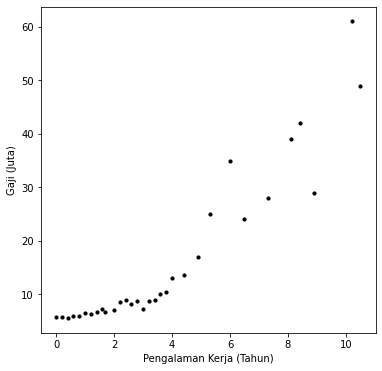

In [2]:
demo.data()

## Decision Tree

In [3]:
demo.decision_tree()

interactive(children=(SelectionSlider(description='decision', index=10, options=(0.1, 0.30000000000000004, 0.5…

In [4]:
demo.max_depth()

interactive(children=(IntSlider(value=1, description='depth', max=7, min=1), Output()), _dom_classes=('widget-…

In [5]:
demo.min_samples_leaf()

interactive(children=(IntSlider(value=1, description='depth', max=7, min=1), IntSlider(value=1, description='m…

In [6]:
demo.bootstrap()

interactive(children=(ToggleButton(value=False, description='bootstrap'), ToggleButton(value=False, descriptio…

## Bagging

In [12]:
demo.bagging() #Random Forest

interactive(children=(IntSlider(value=1, description='n_tree', max=6, min=1), IntSlider(value=1, description='…

## Gradient Boosting

In [11]:
demo.gradient_boosting() # Not Extreem

interactive(children=(IntSlider(value=0, description='iterasi', max=30), Output()), _dom_classes=('widget-inte…